# EE915: Week-5 - Project-5 - Naive Bayes - Email Spam Detection and Purchase Prediction
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Breast Cancer Data Set from sklearn </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project implements naive Bayes algorithm for email spam classification on the data sets provided. The code includes pre-processing steps such as data normalization, feature selection, splitting the dataset into training. The Gaussian Naive Bayes classifier is used for this classification. 

The evaluation metrics used include accuracy, F1 score, precision, recall, RoC/AuC, decision boundary etc. 

Additionally, Laplace smoothing is applied for better accuracy in prediction - particularly in the spam and ham classification of the emails dataset. 

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [ ]:
%pip install seaborn
%pip install wordcloud

In [12]:
# Importing necessary libraries for breast cancer SVM classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, f1_score, average_precision_score
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [13]:
# Define roll number, name, email
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

# Load the dataset
df = pd.read_csv('Kaggle_Email_Spam_Dataset.csv', encoding='latin-1')

# Remove unnecessary columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

# Rename columns for clarity
df.columns = ['label', 'message']

# Verify column names and data
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [14]:
# function to display confusion matrix plot with watermark - wama
def print_confusion_matrix_wama(cm, labels, plot_name, Y_test, wama='23156022'):
    # Calculate counts for each class in the test set
    class_counts = Counter(Y_test)

    # Print the counts
    print("Data Count in Test Set:")
    for class_label, count in class_counts.items():
        if class_label == 0:
            print(f"\tHam: {count}")
        elif class_label == 1:
            print(f"\tSpam: {count}")
        else:
            pass

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(plot_name)

    # Add centered diagonal watermark
    plt.text(0.5, 0.5, wama, fontsize=50, color='gray', alpha=0.2,
             rotation=45, ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

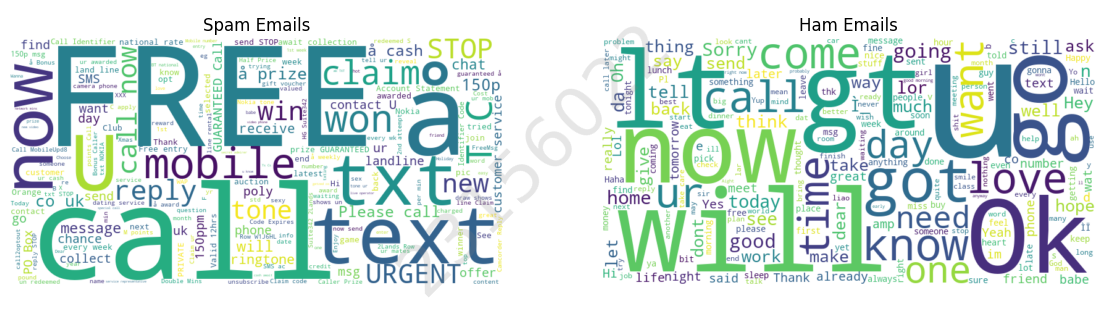

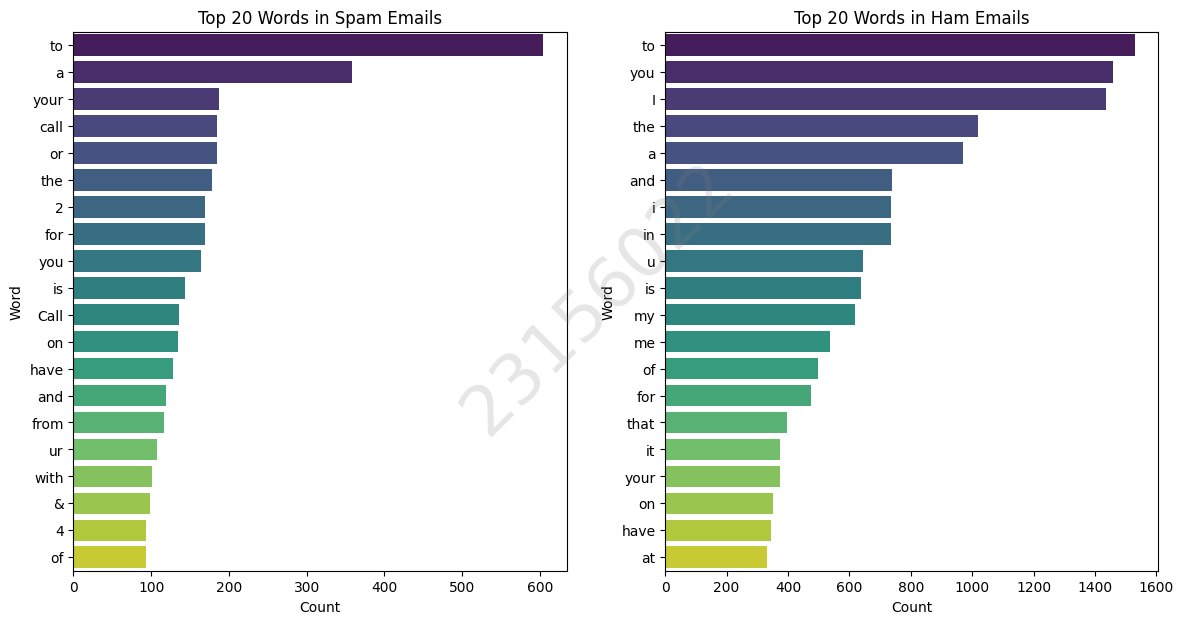

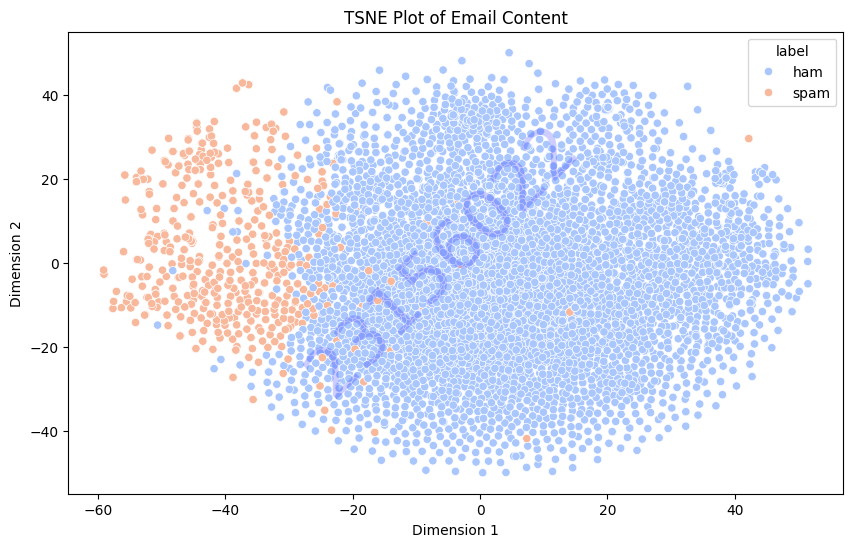

In [15]:
# Plot word cloud, bar plot, and tSNE for the spam data set

# 1. Word Cloud Visualization
spam_text = " ".join(df[df['label'] == 'spam']['message'])
ham_text = " ".join(df[df['label'] == 'ham']['message'])

spam_wc = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Ham Emails')
plt.axis('off')

# Add watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
         rotation=45, ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

# 2. Bar Plot for Most Common Words
spam_words = " ".join(df[df['label'] == 'spam']['message']).split()
ham_words = " ".join(df[df['label'] == 'ham']['message']).split()

spam_counter = Counter(spam_words)
ham_counter = Counter(ham_words)

spam_df = pd.DataFrame(spam_counter.most_common(20), columns=['Word', 'Count'])
ham_df = pd.DataFrame(ham_counter.most_common(20), columns=['Word', 'Count'])

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Count', y='Word', hue='Word', legend=False, data=spam_df, palette='viridis', dodge=False)
plt.title('Top 20 Words in Spam Emails')
# Remove legend if it exists
if ax1.get_legend() is not None:
    ax1.get_legend().remove()

plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Count', y='Word', hue='Word', legend=False, data=ham_df, palette='viridis', dodge=False)
plt.title('Top 20 Words in Ham Emails')
# Remove legend if it exists
if ax2.get_legend() is not None:
    ax2.get_legend().remove()

# Add watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.2,
         rotation=45, ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

# 3. TSNE Plot
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df['message'])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = df['label']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_df, palette='coolwarm')
plt.title('TSNE Plot of Email Content')

# Add watermark
plt.text(0.5, 0.5, roll_number, fontsize=50, color='blue', alpha=0.2,
         rotation=45, ha='center', va='center', transform=plt.gcf().transFigure)

plt.show()

Unique values in encoded labels: [0 1]
Spam Labeling Accuracy Score: 0.9641062455132807
Classification Report:
               PRECISION    RECALL  F1-SCORE   SUPPORT

           0       0.96      1.00      0.98      1196
           1       1.00      0.75      0.85       197

    ACCURACY                           0.96      1393
   MACRO AVG       0.98      0.87      0.92      1393
WEIGHTED AVG       0.97      0.96      0.96      1393

Data Count in Test Set:
	Ham: 1196
	Spam: 197


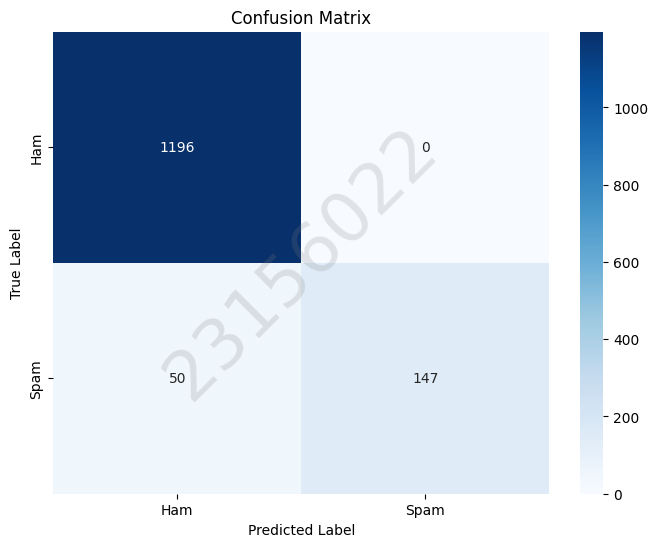

In [17]:
# Build NB model, predict and plot curves

# Encode the target labels
label_encoder = LabelEncoder()

df['label'] = label_encoder.fit_transform(df['label'])  # Convert 'ham' and 'spam' to 0 and 1

# Check the unique values in the encoded target variable
print(f'Unique values in encoded labels: {df["label"].unique()}')

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create and train the Naive Bayes classifier with Laplace smoothing
naive_bayes = MultinomialNB(alpha=1.0)  # alpha is the smoothing parameter
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

# Evaluate the classifier
print(f'Spam Labeling Accuracy Score: {accuracy_score(y_test, y_pred)}')

cm = confusion_matrix(y_test, y_pred)

cr = classification_report(y_test, y_pred).upper()
print('Classification Report:\n', cr)

# Plot confusion matrix with print_confusion_matrix_wama
labels = ['Ham', 'Spam']
plot_name = 'Confusion Matrix'
print_confusion_matrix_wama(cm, labels, plot_name, y_test)


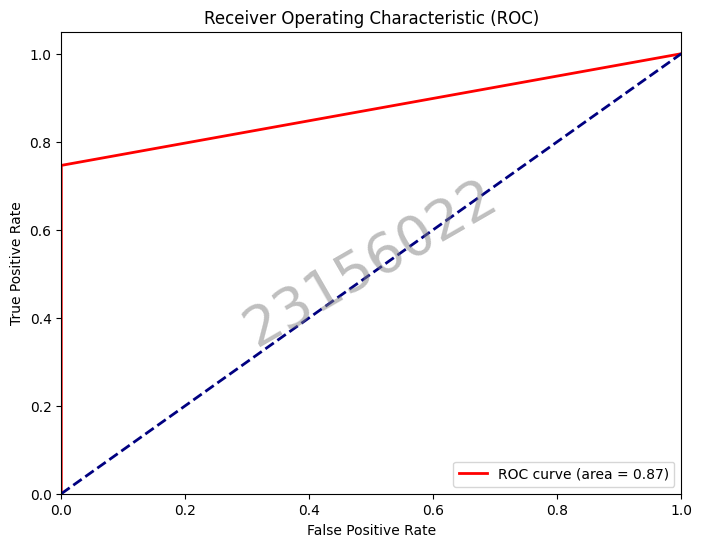

In [6]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.text(0.5, 0.5, roll_number, fontsize=40, color='gray', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()

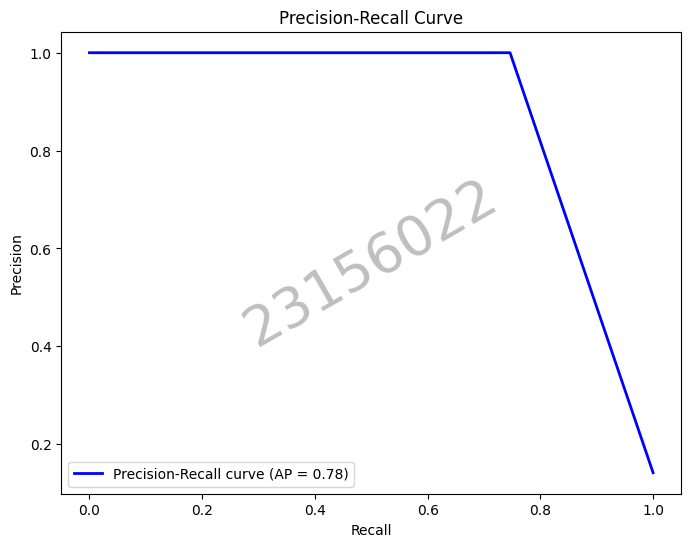

In [7]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.text(0.5, 0.5, roll_number, fontsize=40, color='gray', alpha=0.5, ha='center', va='center', rotation=30, transform=plt.gca().transAxes)
plt.show()

In [20]:
!jupyter nbconvert --to pdf Proj_05_Naive_Bayes_Email_Spam_Full_5.ipynb


[NbConvertApp] Converting notebook Proj_05_Naive_Bayes_Email_Spam_Full_5.ipynb to pdf
[NbConvertApp] Support files will be in Proj_05_Naive_Bayes_Email_Spam_Full_5_files\
[NbConvertApp] Making directory .\Proj_05_Naive_Bayes_Email_Spam_Full_5_files
[NbConvertApp] Writing 69899 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 791867 bytes to Proj_05_Naive_Bayes_Email_Spam_Full_5.pdf
